# EDA of Loan Amount

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Loan_Default.csv")

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Processing

In [5]:
print('Number of rows having null values:')
missing_info = (len(data[data.isnull().any(axis=1)]) / len(data) )*100
print(len(data[data.isnull().any(axis=1)]), 'which is', round(missing_info,2), '%')

Number of rows having null values:
50483 which is 33.96 %


In [6]:
to_drop = ['ID', 'year', 'loan_limit', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'Interest_rate_spread',
          'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'total_units', 
           'co-applicant_credit_type', 'submission_of_application', 'dtir1', 'credit_type', 'Upfront_charges']
data_1 = data.drop(to_drop, axis='columns')

In [7]:
print('Number of rows missing now:')
missing_info = (len(data_1[data_1.isnull().any(axis=1)]) / len(data_1) )*100
print(len(data_1[data_1.isnull().any(axis=1)]), 'which is', round(missing_info,2), '%')

Number of rows missing now:
45304 which is 30.47 %


In [8]:
data_1.isnull().any()

Gender                    False
approv_in_adv              True
open_credit               False
business_or_commercial    False
loan_amount               False
rate_of_interest           True
term                       True
Neg_ammortization          True
property_value             True
Secured_by                False
income                     True
Credit_Score              False
age                        True
LTV                        True
Region                    False
Security_Type             False
Status                    False
dtype: bool

In [9]:
## Cleaning Rate of Interest Column
data_1.rate_of_interest.skew()

0.3884060270841701

As the data is fairly symmetrical so we can replace the null values with mean.

In [10]:
data_1.rate_of_interest.fillna(data_1.rate_of_interest.mean(), inplace=True)

In [11]:
data_1.describe()

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,LTV,Status
count,1.486700e+05,148670.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,3.311177e+05,4.045476,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,1.839093e+05,0.487764,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,1.650000e+04,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,1.965000e+05,3.750000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,2.965000e+05,4.045476,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,4.365000e+05,4.250000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,3.576500e+06,8.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


Maximum value of LTV looks suspicious. We need to keep this in mind while working with LTV.

In [12]:
## Cleaning LTV and Upfront Charges columns
data_2 = data_1[data_1['LTV']<120.0]
print(data_2.LTV.skew())

-0.7231337664437616


The data is now moderately skewed so we can replace the unknown values with median.

In [13]:
data_2.LTV.fillna(data_2.LTV.median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\909844216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.LTV.fillna(data_2.LTV.median(), inplace=True)


In [14]:
data_2.Security_Type.unique()

array(['direct', 'Indriect'], dtype=object)

In [15]:
data_2.Security_Type.replace('Indriect', 'Indirect', inplace=True)
data_2.Security_Type.unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\259137383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.Security_Type.replace('Indriect', 'Indirect', inplace=True)


array(['direct', 'Indirect'], dtype=object)

In [16]:
num = round(100*(data_2.age.isnull().sum()/len(data_2['age'])),2)
print('Percentage of records missing in age', num, '%')

Percentage of records missing in age 0.15 %


As percentage of missing data is quite less so replacing it with mode will not make much effect on our data.

In [17]:
data_2.age.value_counts()

45-54    31367
35-44    29585
55-64    29258
65-74    18346
25-34    17214
>74       6224
<25       1185
Name: age, dtype: int64

In [18]:
data_2.age.fillna('45-54', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\2100745508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.age.fillna('45-54', inplace=True)


In [19]:
print('Number of rows missing now:')
missing_info = (len(data_2[data_2.isnull().any(axis=1)]) / len(data_2) )*100
print(len(data_2[data_2.isnull().any(axis=1)]), 'which is', round(missing_info,2), '%')

Number of rows missing now:
10042 which is 7.53 %


By now we have 26% lesser records with missing values.

In [20]:
data_2.replace('Sex Not Available', value = 'Joint', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\3026249832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.replace('Sex Not Available', value = 'Joint', inplace = True)


In [21]:
data_2['CreditScoreType'] = pd.cut(data_2['Credit_Score'], bins = [500, 600, 700, 800, 900], 
                                 labels=('Poor', 'Fair', 'Good', 'Excellent'))

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\703771273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['CreditScoreType'] = pd.cut(data_2['Credit_Score'], bins = [500, 600, 700, 800, 900],


In [22]:
print('Minimum Loan:', data_2.loan_amount.min())
print('Maximum Loan:', data_2.loan_amount.max())

Minimum Loan: 16500
Maximum Loan: 3576500


In [23]:
data_2['LoanRange'] = pd.cut(data_2.loan_amount, bins=[0.0, 500000.0, 1500000.0, 2500000.0, 3576500.0], 
                           labels = ['Less than 5L', 'Between 5L and 15L', 'Between 15L and 25L', 'Above 25L'], 
                           include_lowest=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\1662239243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['LoanRange'] = pd.cut(data_2.loan_amount, bins=[0.0, 500000.0, 1500000.0, 2500000.0, 3576500.0],


In [24]:
data_2['TermType'] = pd.cut(data_2['term'], bins=[0, 120, 240, 360], 
                          labels=['Paid under 4 months', 'Paid in 4 to 8 months', 'Paid in 8 to 12 months'])

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\2898159779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['TermType'] = pd.cut(data_2['term'], bins=[0, 120, 240, 360],


In [25]:
data_2['LTVRange'] = pd.cut(data_2['LTV'], bins=[0.0,40.0,60.0,80.0,100.0,120.0], 
                              labels=['Less than 40%', 'Between 40% and 60%', 'Between 60% and 80%', 'Between 80% and 100%', 'Above 100%'], 
                              include_lowest=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11376\1899636932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['LTVRange'] = pd.cut(data_2['LTV'], bins=[0.0,40.0,60.0,80.0,100.0,120.0],


In [26]:
to_drop = ['Credit_Score', 'term', 'LTV']
data_3 = data_2.drop(to_drop, axis='columns')

In [27]:
data_3.head()

,Gender,approv_in_adv,open_credit,business_or_commercial,loan_amount,rate_of_interest,Neg_ammortization,property_value,Secured_by,income,age,Region,Security_Type,Status,CreditScoreType,LoanRange,TermType,LTVRange
0,Joint,nopre,nopc,nob/c,116500,4.045476,not_neg,118000.0,home,1740.0,25-34,south,direct,1,Good,Less than 5L,Paid in 8 to 12 months,Between 80% and 100%
2,Male,pre,nopc,nob/c,406500,4.560000,neg_amm,508000.0,home,9480.0,35-44,south,direct,0,Excellent,Less than 5L,Paid in 8 to 12 months,Between 80% and 100%
3,Male,nopre,nopc,nob/c,456500,4.250000,not_neg,658000.0,home,11880.0,45-54,North,direct,0,Poor,Less than 5L,Paid in 8 to 12 months,Between 60% and 80%
4,Joint,pre,nopc,nob/c,696500,4.000000,not_neg,758000.0,home,10440.0,25-34,North,direct,0,Fair,Between 5L and 15L,Paid in 8 to 12 months,Between 80% and 100%
5,Joint,pre,nopc,nob/c,706500,3.990000,not_neg,1008000.0,home,10080.0,35-44,North,direct,0,Excellent,Between 5L and 15L,Paid in 8 to 12 months,Between 60% and 80%


### Analysis

In [28]:
sns.set()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TermType', ylabel='rate_of_interest'>

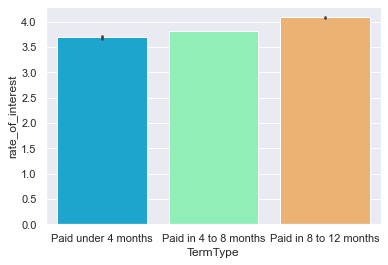

In [29]:
sns.barplot('TermType', 'rate_of_interest', data=data_3, palette='rainbow')

Loans with longer term period are charged higher rate of interest.

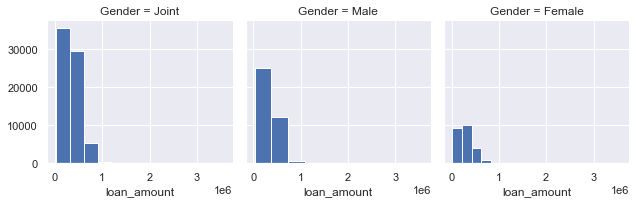

In [30]:
data_new = sns.FacetGrid(data_3, col = 'Gender')
data_new.map(plt.hist, 'loan_amount')

The above graph shows that Females have take lesser loan amount.

<Figure size 864x360 with 0 Axes>

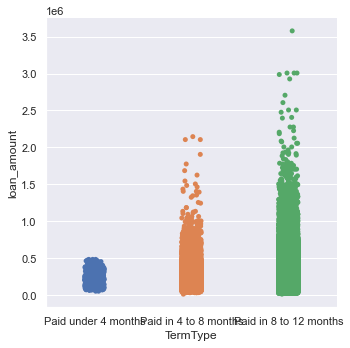

In [31]:
plt.figure(figsize=(12,5))
sns.catplot(x='TermType', y='loan_amount', data=data_3)

The above diagram clarifies that most of the people prefer loan term in between 8 to 12 months.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


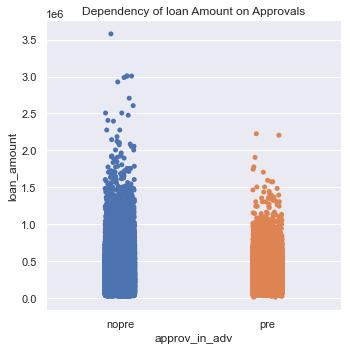

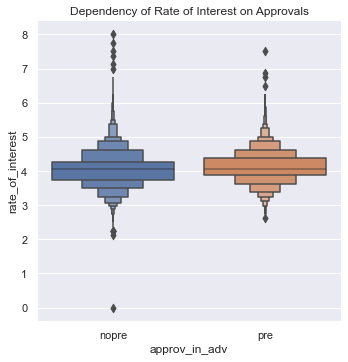

In [32]:
sns.catplot('approv_in_adv', 'loan_amount', data=data_3, kind='strip').set(title='Dependency of loan Amount on Approvals')
sns.catplot('approv_in_adv', 'rate_of_interest', data=data_3, kind='boxen').set(title='Dependency of Rate of Interest on Approvals')

- If a person needs high loan amount then there are more chances that the person will not get the approval in advance. 
- Somewhat difference can be seen on the rate of interest.

<AxesSubplot:xlabel='LoanRange', ylabel='rate_of_interest'>

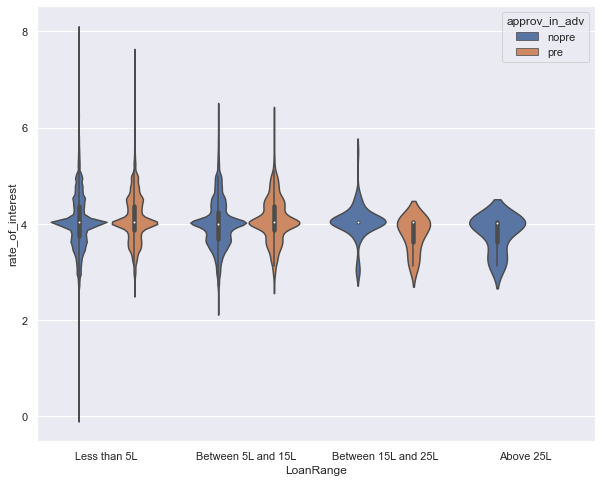

In [33]:
plt.figure(figsize=(10,8))
sns.violinplot(x='LoanRange', y='rate_of_interest', hue='approv_in_adv', data=data_3)

- From the above graph we can say that rate of interest is almost same in between 3.7% and 4.5% for loan amount lesser than 25L but is lesser for loan amount greater than 25L.
- And there is no approval taken in advance for loan above 25L and for loan in between 15L to 25L has lesser rate of interest when approval is taken in advance.

[Text(0.5, 1.0, 'Purpose of taking loan')]

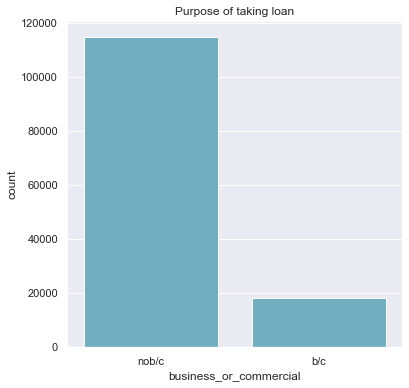

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x='business_or_commercial',data=data_3, color='c').set(title='Purpose of taking loan')

Above graph clarifies that more people are taking loan for non-commercial purpose.

[Text(0.5, 1.0, 'Purpose of taking loan')]

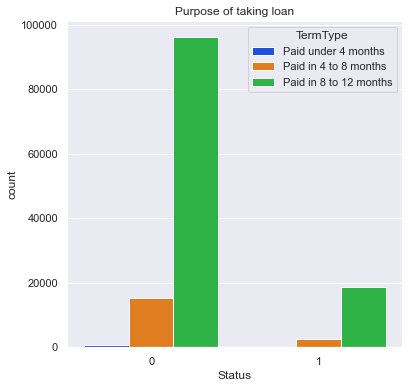

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='Status',data=data_3, hue='TermType', palette='bright').set(title='Purpose of taking loan')

Most of the people with active loan are from long term category.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neg_ammortization', ylabel='count'>

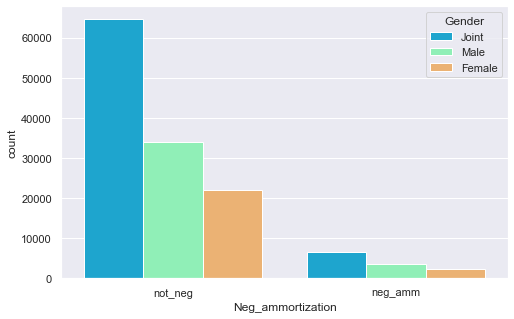

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data_3['Neg_ammortization'], hue=data_3['Gender'], palette='rainbow')

Very less people can be seen in negative ammortization that means most of the people are paying their regular installments in time.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='property_value', ylabel='Density'>

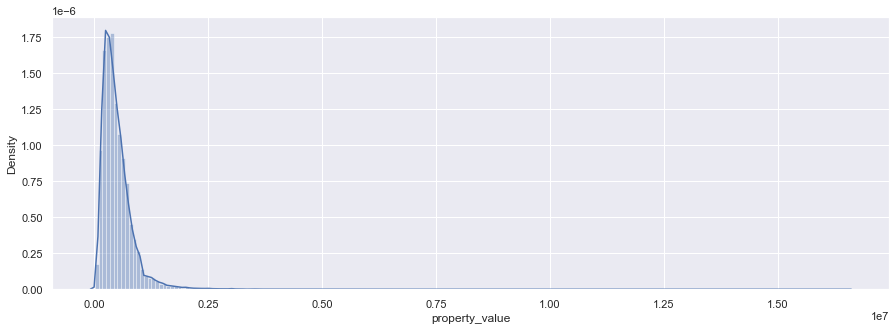

In [37]:
plt.figure(figsize=(15,5))
sns.distplot(data_3['property_value'], 200)

In [38]:
data_3['property_value'].median()

418000.0

In [39]:
data_3['property_value'].max()

16508000.0

Even though max property value is ~165L, most of the people have property lesser than ~15L with median of ~4L.

In [40]:
num = len(data_3[data_3['Security_Type']=='Indirect'])
print('Number of person with Indirect security type:', num, 'which is almost', round(100*num/len(data_3),3), '%')

Number of person with Indirect security type: 33 which is almost 0.025 %


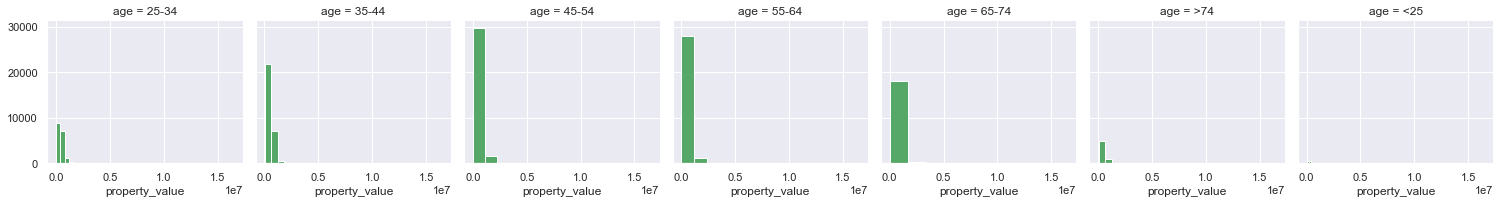

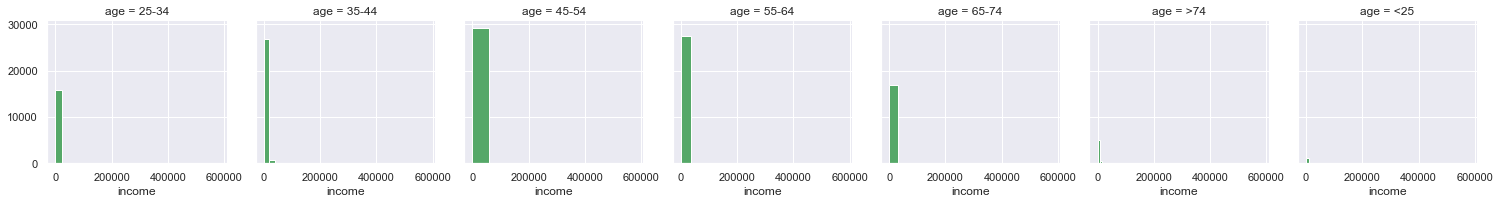

In [41]:
data_new = sns.FacetGrid(data_3, col = 'age')
data_new.map(plt.hist, 'property_value', color='g')

data_new = sns.FacetGrid(data_3, col = 'age')
data_new.map(plt.hist, 'income', color='g')

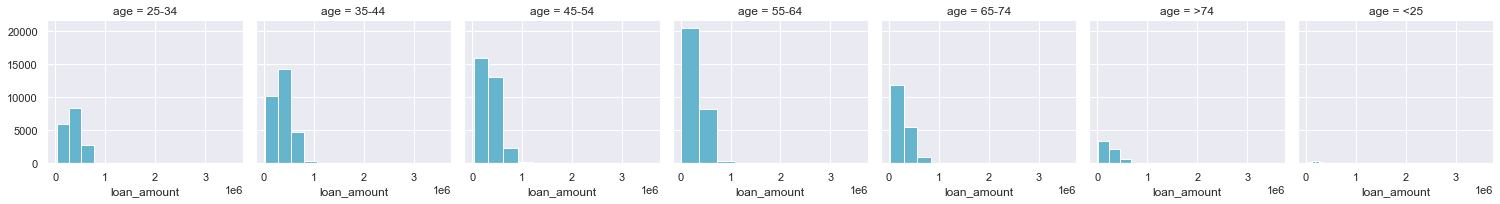

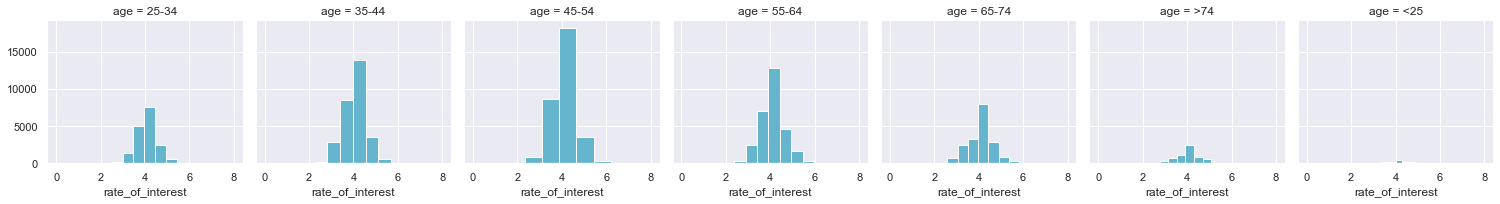

In [42]:
data_new = sns.FacetGrid(data_3, col = 'age')
data_new.map(plt.hist, 'loan_amount', color='c')

data_new = sns.FacetGrid(data_3, col = 'age')
data_new.map(plt.hist, 'rate_of_interest', color='c')

Property value and income of people with age group 45-54 and 55-64 is almost same. But a good difference can be seen in the loan amount where people with age group 55-64 have taken more loans and with lesser rate of interest.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

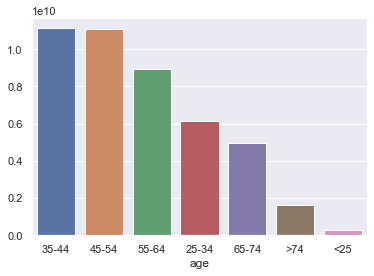

In [43]:
data_new = data_3.groupby(['age'])['loan_amount'].sum().sort_values(ascending=False)
sns.barplot(data_new.index, data_new.values)

Even though people with age group 55-64 have taken more loans but highest amount is taken by age group 35-54.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScoreType', ylabel='loan_amount'>

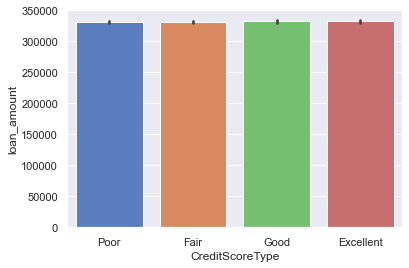

In [44]:
sns.barplot('CreditScoreType', 'loan_amount', data=data_3, palette='muted')

Credit Scores are equally disributed among various categories.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region'>

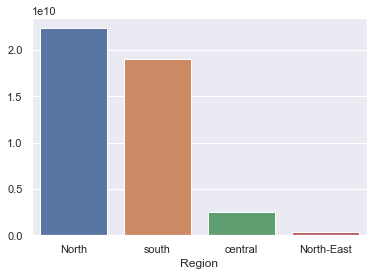

In [45]:
data_new = data_3.groupby(['Region'])['loan_amount'].sum().sort_values(ascending=False)
sns.barplot(data_new.index, data_new.values)

People from North and South have taken more loan overall.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LTVRange', ylabel='count'>

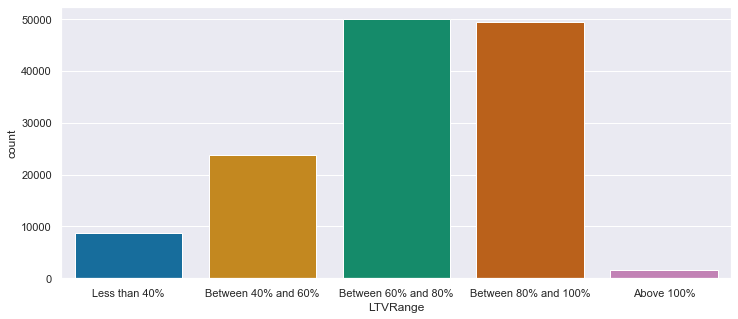

In [46]:
plt.figure(figsize=(12,5))
sns.countplot('LTVRange',data=data_3, palette='colorblind')

In [47]:
num = len(data_3[(data_3['LTVRange']=='Between 80% and 100%') | (data_3['LTVRange']=='Above 100%')])
print('Number of person with LTV Range greater than 80%:', num, 'which is almost', round(100*num/len(data_3),2), '%')

Number of person with LTV Range greater than 80%: 50919 which is almost 38.18 %


In [48]:
num = len(data_3[data_3['LTVRange']=='Above 100%'])
num1 = len(data_3[(data_3['LTVRange']=='Between 80% and 100%') | (data_3['LTVRange']=='Above 100%')])
print('Number of person with LTV Range greater than 100%:', num, 'which is almost', round(100*num/num1,2), '%')

Number of person with LTV Range greater than 100%: 1606 which is almost 3.15 %


In [49]:
num = len(data_3[data_3['Secured_by']=='home'])
print('Number of person with home as security for loan:', num, 'which is almost', round(100*num/len(data_3),2), '%')

Number of person with home as security for loan: 133346 which is almost 99.98 %


### Conclusions

- Most of the loans are taken by the people with age group 55-64. But considering aggregated loan amount, age group 35-44 and 45-54 are on top.
- Most of the people with active loan are from long term category i.e. from 8 to 12 months which is preferred by most of the people and longer term loans are charged more rate of interest.
- People from North and South region have taken more loan amount.
- ~99.98% people prefer to give home as a security type for a loan.
- ~38.18% people have LTV range more than 80%.
- Very less number of loans are given on Indirect Security type i.e. ~0.025%.
- Even though max property value is ~165L, most of the people have property lesser than ~15L with median of ~4L.
- Very less people can be seen in negative ammortization that means most of the people are paying their regular installments in time.
- More people are taking loan for non-commercial purpose.
- Rate of interest is almost same in between 3.7% and 4.5% for loan amount upto 25L but is less for loan amount avove 25L. - There is no approval taken in advance for loan above 25L 
- For loan in between 15L to 25L has lesser rate of interest when approval is taken in advance.
- If a person needs high loan amount then there are more chances that the person will not get the approval in advance.